# 정책브리핑 워드 클라우드

In [32]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import time
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 정책브리핑 크롤링

In [8]:
driver=webdriver.Chrome('./chromedriver.exe')
url='https://www.korea.kr/totalSearch.do?srchFlag=Y&keyword=%EB%B6%80%EB%8F%99%EC%82%B0&oldKeyword=%EB%B6%80%EB%8F%99%EC%82%B0&resultKeyword=%EB%B6%80%EB%8F%99%EC%82%B0&sort=date&scnt=1&punit=10&where=news_korea_new_v2&dateRange=all&range=ALL&op=and&multiFlag=Y&news_type=pol'
driver.get(url)
time.sleep(2)

#새로운 검색어 입력
elem=driver.find_element(By.NAME,'topSearchKeyword')
elem.clear()#기존 텍스트 삭제
elem.send_keys('태양광')
elem.send_keys(Keys.RETURN)
time.sleep(2)

#정책 뉴스로 이동
driver.find_element(By.XPATH,'//*[@id="news_korea_new_v2"]/div[1]/div/ul/li[2]/a').click()
time.sleep(2)

res=[bs(driver.page_source,'html.parser')]


#3페이지까지 페이지 소스 가져오기
pages=14
for page in range(2,pages+1):
    if page%10 == 0:
        driver.find_element(By.LINK_TEXT,str(page)).click()
        time.sleep(2)
        tmp=driver.page_source
        res.append(bs(tmp))
        driver.find_element(By.XPATH,'//*[@id="paging"]/div/a[3]').click()
    else:
        driver.find_element(By.LINK_TEXT,str(page)).click()
        time.sleep(2)
        tmp=driver.page_source
        res.append(bs(tmp))
    
driver.quit()

C:\Users\user\AppData\Local\Temp\ipykernel_22580\1580733740.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('./chromedriver.exe')


In [9]:
result=[]
for j in res:
    for i in j.select('span.text>strong>a'):
        result.append({
            '제목':i.text.replace('\t',''),
            '링크':'https://www.korea.kr'+i['href']
        })

df=pd.DataFrame(result)
display(df)

,제목,링크
0,\n내년부터 산지태양광 설비 3000여개 특별 안전점검\n,https://www.korea.kr/news/policyNewsView.do?ne...
1,"\n산업부, 에너지안전대책반 긴급 구성…전기 피해 복구지원\n",https://www.korea.kr/news/policyNewsView.do?ne...
2,\n경영 걸림돌 경제 규제 50개 우선 추진…1조6000억 이상 투자 창출\n,https://www.korea.kr/news/policyNewsView.do?ne...
3,\n탄소중립 바람 타고 돌아온 ‘원전’…전 세계가 ‘주목’\n,https://www.korea.kr/news/policyNewsView.do?ne...
4,"\n새만금 산단, 국내 최초 ‘스마트그린 국가시범산단’ 지정\n",https://www.korea.kr/news/policyNewsView.do?ne...
...,...,...
135,"\n서울, 그린뉴딜로 2050년까지 탄소배출 제로도시 만든다\n",https://www.korea.kr/news/policyNewsView.do?ne...
136,\n재생에너지 전기 쓰면 온실가스 감축 인정…한국형 ‘RE100’ 도입\n,https://www.korea.kr/news/policyNewsView.do?ne...
137,\n선택 아닌 필수 ‘탄소중립’…지속 가능한 경제로 전환 가속화\n,https://www.korea.kr/news/policyNewsView.do?ne...
138,\n위기 넘어 경제회복 선도 국가로…대한민국 대전환 시동\n,https://www.korea.kr/news/policyNewsView.do?ne...


In [10]:
res_lst=[]

for i in df['링크']:
    html=requests.get(i)
    soup=bs(html.text,'html.parser')
    title=soup.select_one('div.article-head>h1').text
    date=soup.select('div.article-head div.info span')[0].text
    writer=soup.select('div.article-head div.info span')[1].text
    contents=soup.find('div','view-cont').text
    temp={
        '제목':title,
        '작성일':date,
        '작성자':writer,
        '내용':contents
    }
    res_lst.append(temp)

In [11]:
df_lst=pd.DataFrame(res_lst)
display(df_lst)

,제목,작성일,작성자,내용
0,내년부터 산지태양광 설비 3000여개 특별 안전점검,2022.08.22,산업통상자원부,\n내년부터 산지태양광 시설 3000여개에 대해 특별 안전점검을 시행한다.\n또 1...
1,"산업부, 에너지안전대책반 긴급 구성…전기 피해 복구지원",2022.08.09,산업통상자원부,\n산업통상자원부는 수도권 폭우와 관련해 에너지안전 대책반을 긴급히 구성하고 피해상...
2,경영 걸림돌 경제 규제 50개 우선 추진…1조6000억 이상 투자 창출,2022.07.28,기획재정부,\n정부가 민간 주도 성장으로 경제 활력을 높이고 복잡한 규제로 어려움을 겪고 있는...
3,탄소중립 바람 타고 돌아온 ‘원전’…전 세계가 ‘주목’,2022.07.19,정책브리핑 원세연,\n원자력발전이 국내 뿐 아니라 전 세계적으로 다시 주목을 받고 있다.\n최근 유럽...
4,"새만금 산단, 국내 최초 ‘스마트그린 국가시범산단’ 지정",2022.07.07,국토교통부,"\n국토교통부와 새만금개발청은 새만금 국가산업단지(5·6공구, 370만 9063㎡)..."
...,...,...,...,...
135,"서울, 그린뉴딜로 2050년까지 탄소배출 제로도시 만든다",2021.01.07,정책브리핑 원세연,\n정부가 2050년까지 탄소 배출량과 흡수량을 맞춰 실질적으로 0으로 줄이는 탄소...
136,재생에너지 전기 쓰면 온실가스 감축 인정…한국형 ‘RE100’ 도입,2021.01.05,산업통상자원부,\n올해부터 기업 등 전기소비자가 재생에너지로 만든 전기를 선택적으로 구매해 사용할...
137,선택 아닌 필수 ‘탄소중립’…지속 가능한 경제로 전환 가속화,2020.12.29,정책브리핑 최선영,\n올 한해를 집어삼킨 단어는 ‘코로나19’다. 전 세계가 ‘코로나19’라는 새로운...
138,위기 넘어 경제회복 선도 국가로…대한민국 대전환 시동,2020.12.28,정책브리핑 원세연,\n올 한해를 집어삼킨 단어는 ‘코로나19’다. 전 세계가 ‘코로나19’라는 새로운...


In [ ]:
df_lst

In [12]:
df_lst['내용'][0]

'\n내년부터 산지태양광 시설 3000여개에 대해 특별 안전점검을 시행한다.\n또 1만 2000여개에 달하는 산지태양광 설비 전기 안전검사 주기를\xa04년에서 2년으로 단축키로 했다.\n산업통상자원부는 최근 집중호우로 인해 산지태양광에 대한 국민적 우려가 높아짐에 따라 산지태양광 안전관리 특별대책을 마련했다고 21일 밝혔다.\n전국의 산지태양광은 지난 정부에서 대폭 늘어나 현재 모두 1만 5220개를 운영하고 있다.\n최근 기록적인 집중호우로 인해 발생한 산사태 중 일부가 인근에 소재한 산지태양광과 관련성이 있다는 지적이 제기되고 있어 이번 대책을 마련했다고 산업부는 설명했다.\n먼저 상대적으로 안전이 취약해 특별관리가 필요한 산지태양광 3000여개(전체 산지태양광의 20%)를 선정해 해마다 전문기관의 안전점검을 시행할 계획이다.\n해당 태양광설비에 대해서는 내년부터 정기검사 또는 특별안전점검 형태로 매년 실시할 계획이며, 안전관리 효과를 높이기 위해 최대한 여름철 이전 상반기 중으로 점검을 완료할 계획이다.\n특별관리가 필요한 산지태양광은 산사태 위험 등급, 사고이력, 지자체 의견 등을 종합해 오는 10월까지 선정하고 올해 4분기부터 안전점검을 추진할 계획이다.\n태양광발전시설\n취약설비 외의 모든 산지태양광 설비 1만 2000여개에 대해서는 현재 4년 주기에서 내년부터 2년 주기로 전기안전 정기검사를 실시해 안전관리를 대폭 강화한다.\n아울러 산사태 등에 대비해 안전검사의 전문성을 높이기 위해 점검기관(전기안전공사)의 토목전문가 보강 등을 통해 검사 역량을 강화해나갈 계획이다.\n또 산지태양광 발전사업자 등이 안전관리를 철저히 하도록 관련 제도를 강화할 방침이다.\n전기안전공사 등 검사기관의 안전점검 관련 안전조치 명령에 대한 이행력을 강화하기 위해 안전조치 미이행 사업자에 대해 신재생공급인증서(REC) 발급 중단 등 안전제도를 강화한다.\xa0정기검사를 거부하거나 기피 또는 부적합설비를 보수하지 않을 경우에는 전력거래를 중단할 수 있도록 법령개정도 추진

# 명사 추출

In [14]:
okt=Okt()
words=okt.nouns(df_lst['내용'][0])
str_words=' '.join(words)
str_words

'내년 산지 태양광 시설 여개 대해 특별 안전 점검 시행 또 여개 달 산지 태양광 설비 전기 안전 검사 주기 단축키 산업 통상 자원부 최근 집중호우 산지 태양광 대한 국민 우려 산지 태양광 안전 관리 특별 대책 마련 전국 산지 태양광 지난 정부 대폭 현재 모두 개 운영 최근 기록 집중호우 발생 산사태 중 일부 인근 소재 산지 태양광 관련성 지적 제기 이번 대책 마련 산업부 설명 먼저 상대 안전 취약 특별 관리 산지 태양광 여개 전체 산지 태양광 를 선정 기관 안전 점검 시행 계획 해당 태양광 설비 대해 내년 정기 검사 특별 안전 점검 형태 매년 실시 계획 안전 관리 효과 위해 최대한 여름철 이전 상반기 중 점검 완료 계획 특별 관리 산지 태양광 산사태 위험 등급 사고 이력 지자체 의견 등 종합 선정 올해 안전 점검 추진 계획 태양광 발전 시설 취약 설비 외 모든 산지 태양광 설비 여개 대해 현재 주기 내년 주기 전기 안전 정기 검사 실시 안전 관리 대폭 산사태 등 대비 안전 검사 전문성 위해 점검 기관 전기 안전 공사 의 토목 전문가 보강 등 통해 검사 역량 계획 또 산지 태양광 발전 사업자 등 안전 관리 관련 제도 방침 전기 안전 공사 등 검사 기관 안전 점검 관련 안전 조치 명령 대한 이행 위해 안전 조치 이행 사업자 대해 재생 공급 인증서 발급 중단 등 안전 제도 정기 검사 거부 거나 기피 부적합 설비 보수 경우 전력 거래 중단 수 법령 정도 추진 계획 이 전체 산지 태양광 대상 개별 태양광 설비 별 부지 경사 산사태 위험 점검 및 피해 이력 안전 시설 정보 등 안전 관리 를 구축 산지 전문 기관 공동 산지 태양광 특화된 안전 관리 및 점검 체크 리스트 등 안전 관리 매뉴얼 작성 시설 물 관련 피해 발생 시 손해 보상 통해 피해 복구 지원 사고 보험 도입 검토 문의 산업 통상 자원부 재생 에너지정책 관 재생 에너지정책 경제정책 관 에너지 안전'

In [19]:
okt=Okt()

res = []
for i in df_lst['내용']:
    words=okt.nouns(i)
    str_words=' '.join(words)
    res.append(str_words)

In [25]:
res[0]

'내년 산지 태양광 시설 여개 대해 특별 안전 점검 시행 또 여개 달 산지 태양광 설비 전기 안전 검사 주기 단축키 산업 통상 자원부 최근 집중호우 산지 태양광 대한 국민 우려 산지 태양광 안전 관리 특별 대책 마련 전국 산지 태양광 지난 정부 대폭 현재 모두 개 운영 최근 기록 집중호우 발생 산사태 중 일부 인근 소재 산지 태양광 관련성 지적 제기 이번 대책 마련 산업부 설명 먼저 상대 안전 취약 특별 관리 산지 태양광 여개 전체 산지 태양광 를 선정 기관 안전 점검 시행 계획 해당 태양광 설비 대해 내년 정기 검사 특별 안전 점검 형태 매년 실시 계획 안전 관리 효과 위해 최대한 여름철 이전 상반기 중 점검 완료 계획 특별 관리 산지 태양광 산사태 위험 등급 사고 이력 지자체 의견 등 종합 선정 올해 안전 점검 추진 계획 태양광 발전 시설 취약 설비 외 모든 산지 태양광 설비 여개 대해 현재 주기 내년 주기 전기 안전 정기 검사 실시 안전 관리 대폭 산사태 등 대비 안전 검사 전문성 위해 점검 기관 전기 안전 공사 의 토목 전문가 보강 등 통해 검사 역량 계획 또 산지 태양광 발전 사업자 등 안전 관리 관련 제도 방침 전기 안전 공사 등 검사 기관 안전 점검 관련 안전 조치 명령 대한 이행 위해 안전 조치 이행 사업자 대해 재생 공급 인증서 발급 중단 등 안전 제도 정기 검사 거부 거나 기피 부적합 설비 보수 경우 전력 거래 중단 수 법령 정도 추진 계획 이 전체 산지 태양광 대상 개별 태양광 설비 별 부지 경사 산사태 위험 점검 및 피해 이력 안전 시설 정보 등 안전 관리 를 구축 산지 전문 기관 공동 산지 태양광 특화된 안전 관리 및 점검 체크 리스트 등 안전 관리 매뉴얼 작성 시설 물 관련 피해 발생 시 손해 보상 통해 피해 복구 지원 사고 보험 도입 검토 문의 산업 통상 자원부 재생 에너지정책 관 재생 에너지정책 경제정책 관 에너지 안전'

In [26]:
str_words=' '.join(res)

In [27]:
len(str_words)

252429

In [50]:
df_tmp = pd.DataFrame({'내용': res})
df_tmp.to_csv('정책브리핑 태양광.csv', encoding='euc-kr')

# 워드 클라우드

In [ ]:
stopwords = []

In [36]:
stopwords = ['등', '및', '것', '수', '에너지', '위해', '위', '를', '개', '통해', '이']

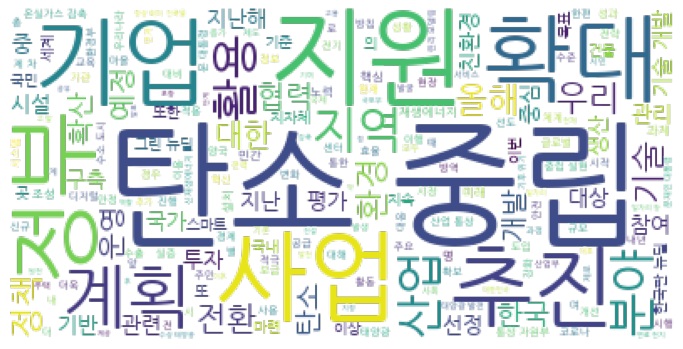

In [39]:
txt = str_words

wc = WordCloud('./NanumGothic.ttf',
               mode='RGBA',
               background_color = None,
               max_words = 200,
               stopwords = stopwords)
wc = wc.generate(txt) # str자료만 가능, list자료는 안됨
plt.figure(figsize = (12, 12))
plt.imshow(wc) #interpolation = "bilinear")
plt.axis("off")

# plt.savefig('정책브리핑_태양광_워드클라우드.png')
plt.show()